# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name) #content/cell_images/train/parasitized and /uninfected

    for i, image_name in enumerate(images_path): #for the image in each of the training directories

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1) #if an image is a parasitized cell, then label the image as 1 (parasitized/infected)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

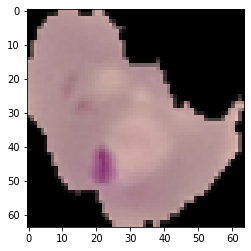

In [ ]:
plt.imshow(train_images[0])

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1) #label the validation data

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

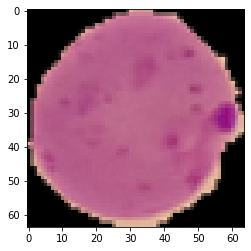

In [ ]:
plt.imshow(test_images[0])

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print("Shape - Training Image", train_images[0].shape)
print("Shape - Testing Images", test_images[0].shape)

Shape - Training Image (64, 64, 3)
Shape - Testing Images (64, 64, 3)


In [ ]:
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


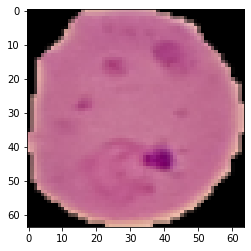

In [ ]:
plt.imshow(test_images[10])

###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
print("Shape - Training Labels", train_labels.shape)
print("Shape - Testing Labels", test_labels.shape)

Shape - Training Labels (24958,)
Shape - Testing Labels (2600,)


####<b> Observations and insights: The training data consists of 24,958 images of the shape (64,64,3) and the testing data consists of 2,600 images of the shape (64,64,3). Similarly, their respective labels are also 24,958 for the training labels and 2,600 for the testing labels, with the label arrays containing 0 or 1 if the cells are uninfected or parasitized, respectively.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
train_max_c1 = []
train_max_c2 = []
train_max_c3 = []
train_min_c1 = []
train_min_c2 = []
train_min_c3 = []
for image in train_images:
  maxc1 = np.max(image[:,:,0])
  minc1 = np.min(image[:,:,0])
  train_max_c1.append(maxc1)
  train_min_c1.append(minc1)

  maxc2 = np.max(image[:,:,1])
  minc2 = np.min(image[:,:,1])
  train_max_c2.append(maxc2)
  train_min_c2.append(minc2)

  maxc3 = np.max(image[:,:,2])
  minc3 = np.min(image[:,:,2])
  train_min_c3.append(minc3)
  train_max_c3.append(maxc3)
print("The maximum pixel value in the training images for Channel 1:", np.max(train_max_c1))
print("The maximum pixel value in the training images for Channel 2:", np.max(train_max_c2))
print("The maximum pixel value in the training images Channel 3:", np.max(train_max_c3))
print("The minimum pixel value in the training images for Channel 1:", np.min(train_min_c1))
print("The minimum pixel value in the training images for Channel 2:", np.min(train_min_c2))
print("The minimum pixel value in the training images Channel 3:", np.min(train_min_c3))

test_max_c1 = []
test_max_c2 = []
test_max_c3 = []
test_min_c1 = []
test_min_c2 = []
test_min_c3 = []
for image in test_images:
  maxc1_test = np.max(image[:,:,0])
  minc1_test = np.min(image[:,:,0])
  test_max_c1.append(maxc1_test)
  test_min_c1.append(minc1_test)

  maxc2_test = np.max(image[:,:,1])
  minc2_test = np.min(image[:,:,1])
  test_max_c2.append(maxc2_test)
  test_min_c2.append(minc2_test)

  maxc3_test = np.max(image[:,:,2])
  minc3_test = np.min(image[:,:,2])
  test_max_c3.append(maxc3_test)
  test_min_c3.append(minc3_test)
print("-----------------------------------------------------------------------------")
print("The maximum pixel value in the test images for Channel 1:", np.max(train_max_c1))
print("The maximum pixel value in the test images for Channel 2:", np.max(train_max_c2))
print("The maximum pixel value in the test images Channel 3:", np.max(train_max_c3))
print("The maximum pixel value in the test images for Channel 1:", np.min(train_min_c1))
print("The maximum pixel value in the test images for Channel 2:", np.min(train_min_c2))
print("The maximum pixel value in the test images Channel 3:", np.min(train_min_c3))

The maximum pixel value in the training images for Channel 1: 255
The maximum pixel value in the training images for Channel 2: 245
The maximum pixel value in the training images Channel 3: 240
The minimum pixel value in the training images for Channel 1: 0
The minimum pixel value in the training images for Channel 2: 0
The minimum pixel value in the training images Channel 3: 0
-----------------------------------------------------------------------------
The maximum pixel value in the test images for Channel 1: 255
The maximum pixel value in the test images for Channel 2: 245
The maximum pixel value in the test images Channel 3: 240
The maximum pixel value in the test images for Channel 1: 0
The maximum pixel value in the test images for Channel 2: 0
The maximum pixel value in the test images Channel 3: 0


####<b> Observations and insights: In the training and test images, the maximum pixel value for all the channels is 255 while the minimum is 0.



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values
train_labelSeries = pd.Series(train_labels)
test_labelSeries = pd.Series(test_labels)
print(train_labelSeries.value_counts())
print(test_labelSeries.value_counts())

1    12582
0    12376
dtype: int64
1    1300
0    1300
dtype: int64


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: The Training data has 12,582 labeled parasitized cells and 12,376 uninfected cells. The Testing data has 1,300 paraisitized and uninfected cells. It has now been normalized.

###<b> Plot to check if the data is balanced

Text(0, 0.5, 'Count')

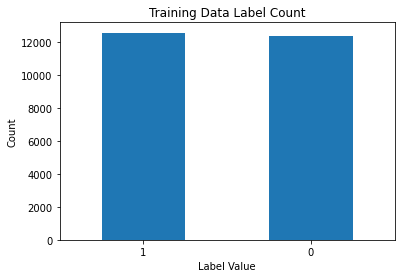

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
#Make this better

plt1 = train_labelSeries.value_counts().plot(kind = 'bar', title ="Training Data Label Count")
plt1.set_xlabel("Label Value")
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)
plt1.set_ylabel("Count")

Text(0, 0.5, 'Count')

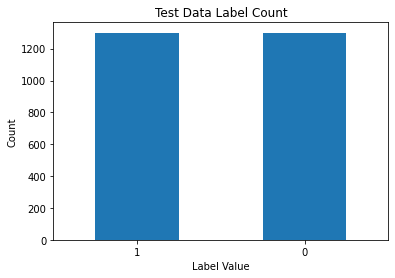

In [ ]:
plt2 = test_labelSeries.value_counts().plot(kind = 'bar', title ="Test Data Label Count")
plt2.set_xlabel("Label Value")
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=0)
plt2.set_ylabel("Count")

####<b> Observations and insights: The data for both training and testing is balanced, refer to the numbers above.

### <b>Data Exploration</b>
Let's visualize the images from the train data

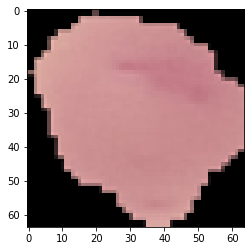

In [ ]:
plt.imshow(train_images[1])

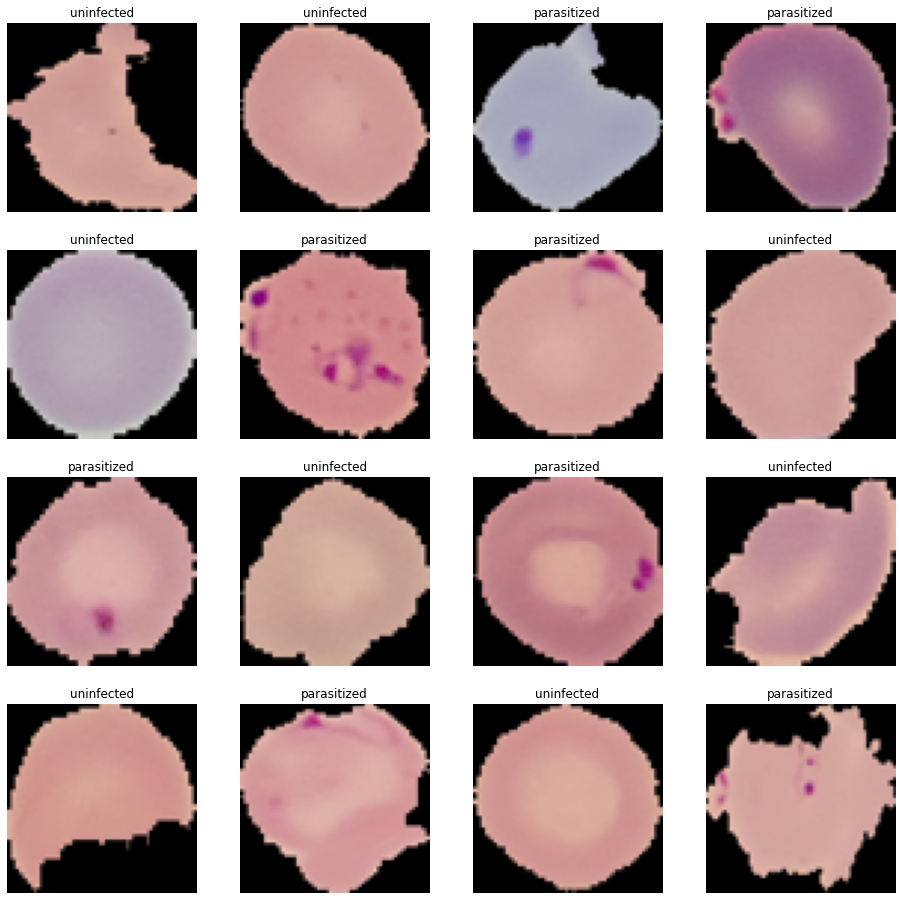

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: Both uninfected and parasitized cells come in different shapes and sizes. Some uninfected cells do have some particles inside them but the biggest distinction between parasitized and uninfected cells is that the parasitized cells have a bigger, purple particle (or multiple purple particles) inside them.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

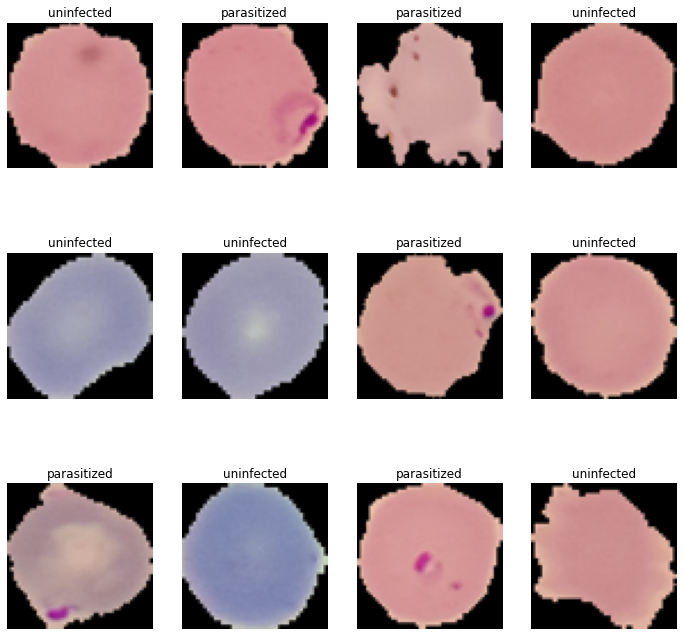

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(45)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 13):

    plt.subplot(3, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


####<b>Observations and insights: Both uninfected and parasitized cells come in different shapes and sizes. Some uninfected cells do have some particles inside them but the biggest distinction between parasitized and uninfected cells is that the parasitized cells have a bigger, purple particle (or multiple purple particles) inside them. The purple particle can only be seen in the parasitized cells.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

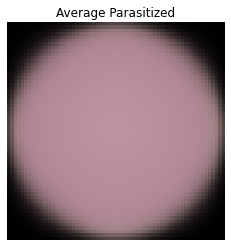

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

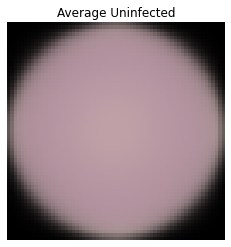

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')



In [ ]:
#print(parasitized_mean)
#print(uninfected_mean)

####<b> Observations and insights: The parasitized cell's mean image appears to be pinker than the average uninfected cell. This is because, as observed in the earlier images, the parasitized cells have a purple particle (parasite) in them. However, not all the parasitized cells have the parasite in the same exact location, causing the overall (average) image of them to appear pinker than the uninfected one. However, the difference between the two mean images is not very significant.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

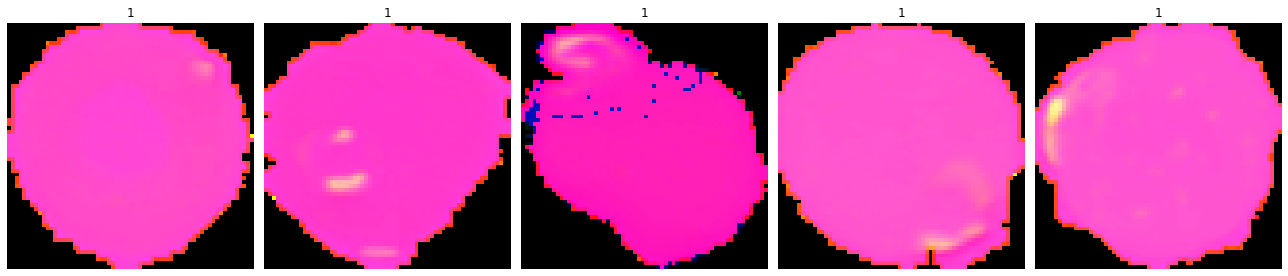

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

In [ ]:
# Similarly you can visualize for the images in the test data
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx_test.append(a)

gfx_test = np.array(gfx_test)

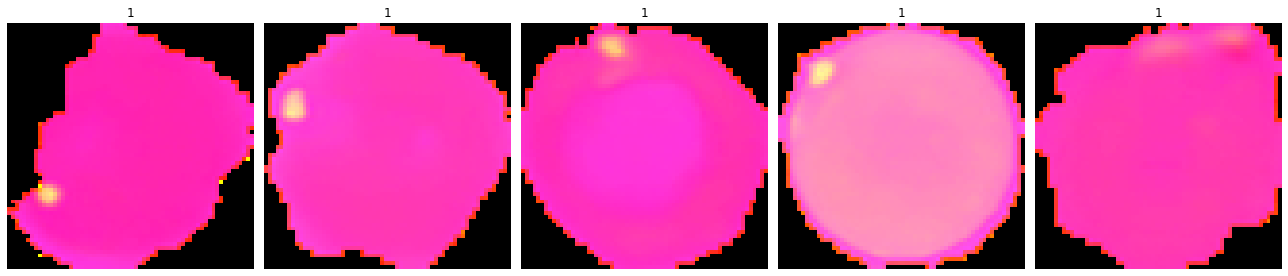

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations and insights: The HSV color model allows for better visualization as it's based on how human's percieve colors. The spots in the cells (particles/anomalies) are standing out more in the HSV representaiton of the image. Perhaps, an algorithm trained on these images might perform a bit better.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

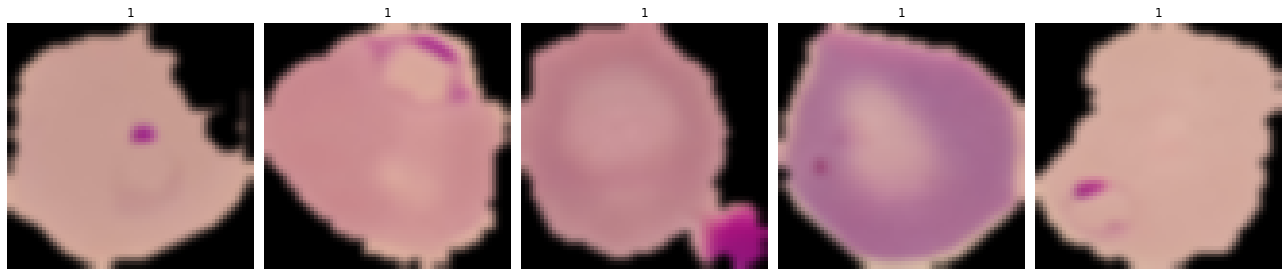

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

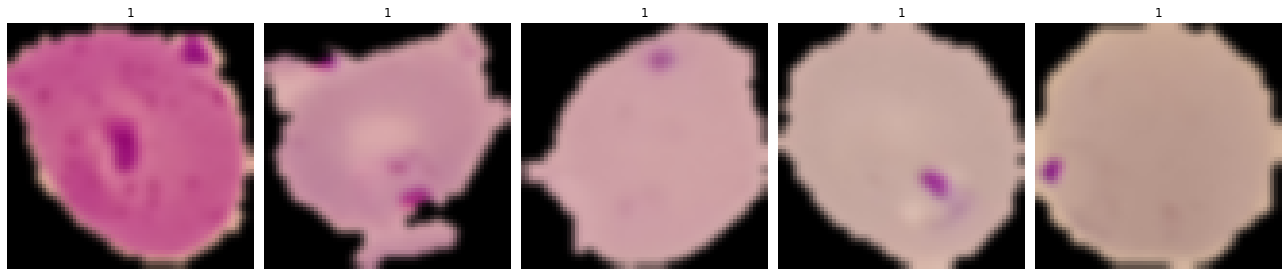

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx_test[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights: Gaussian blurring is usually used to reduce the image noise and reduce details in the picture. However, for this problem statement, the gaussian blur might not be effective since it's remove the small details that the algorithm should be picking up on to classify a cell as paratisized or uninfected. If the model is not able to see the smaller particles in the uninfected model that are not a sign of the parasite, it might not learn that information and might misclassify an uninfected cell as a paratisized cell. Additionally, Gaussian blurring is used also for edge detection, however from the previous images we saw that the edges of the infected vs paratisized cells are not very different. Possible other methods to try might be Image Negatives or Contrast Stretching **

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend

import tensorflow as tf

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import Adam

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 115s 182ms/step - loss: 0.3439 - accuracy: 0.8444 - val_loss: 0.1213 - val_accuracy: 0.9679
Epoch 2/20
624/624 [==============================] - 111s 178ms/step - loss: 0.1262 - accuracy: 0.9532 - val_loss: 0.1740 - val_accuracy: 0.9341
Epoch 3/20
624/624 [==============================] - 106s 170ms/step - loss: 0.1090 - accuracy: 0.9641 - val_loss: 0.0683 - val_accuracy: 0.9898
Epoch 4/20
624/624 [==============================] - 111s 178ms/step - loss: 0.0874 - accuracy: 0.9725 - val_loss: 0.0829 - val_accuracy: 0.9880
Epoch 5/20
624/624 [==============================] - 112s 180ms/step - loss: 0.0692 - accuracy: 0.9771 - val_loss: 0.0818 - val_accuracy: 0.9820


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 35ms/step - loss: 0.0673 - accuracy: 0.9835

 Test_Accuracy:- 0.9834615588188171


<b> Plotting the confusion matrix

82/82 [==============================] - 3s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



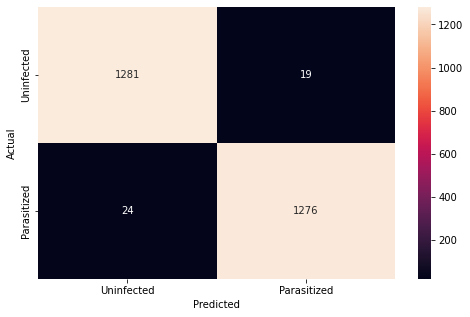

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

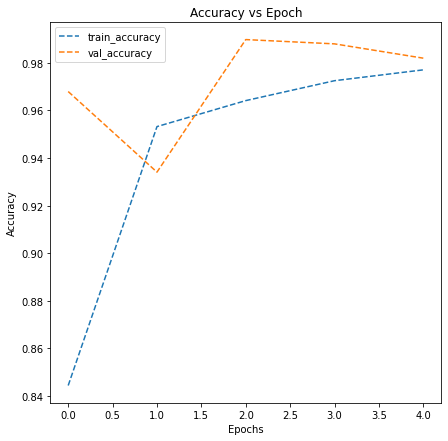

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

#Previous model with some additions

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu")) #added more conv, maxpool and dropout layers

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

opt = Adam(learning_rate=0.001)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 110s 173ms/step - loss: 0.2971 - accuracy: 0.8601 - val_loss: 0.0651 - val_accuracy: 0.9848
Epoch 2/20
624/624 [==============================] - 103s 166ms/step - loss: 0.0926 - accuracy: 0.9687 - val_loss: 0.0839 - val_accuracy: 0.9764
Epoch 3/20
624/624 [==============================] - 106s 170ms/step - loss: 0.0829 - accuracy: 0.9730 - val_loss: 0.0484 - val_accuracy: 0.9868
Epoch 4/20
624/624 [==============================] - 103s 165ms/step - loss: 0.0792 - accuracy: 0.9737 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 5/20
624/624 [==============================] - 103s 165ms/step - loss: 0.0719 - accuracy: 0.9755 - val_loss: 0.0854 - val_accuracy: 0.9726
Epoch 6/20
624/624 [==============================] - 107s 172ms/step - loss: 0.0748 - accuracy: 0.9755 - val_loss: 0.0934 - val_accuracy: 0.9702


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 4s 41ms/step - loss: 0.0675 - accuracy: 0.9758

 Test_Accuracy:- 0.9757692217826843


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 50ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1300
           1       0.96      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



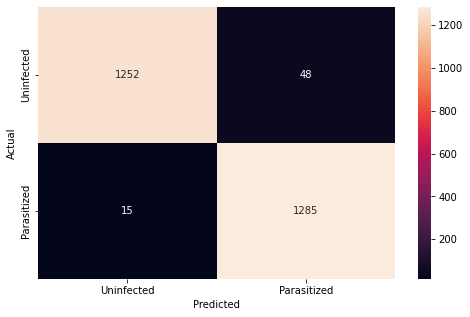

In [ ]:
pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

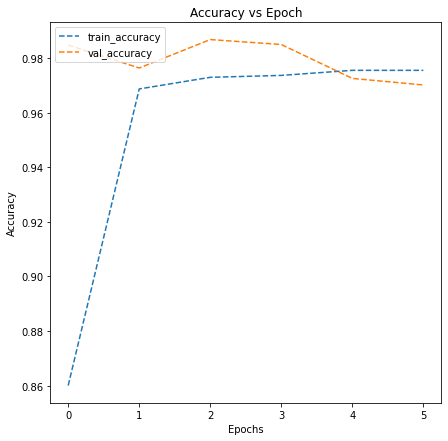

In [ ]:
plot_accuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU


###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(LeakyReLU(0.1))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = "relu"))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax"))

opt = Adam(learning_rate=0.001)

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)       

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.25, epochs = 20, verbose = 1)

Epoch 1/20
585/585 [==============================] - 258s 440ms/step - loss: 0.2587 - accuracy: 0.8851 - val_loss: 2.1608 - val_accuracy: 0.0607
Epoch 2/20
585/585 [==============================] - 276s 472ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 0.0330 - val_accuracy: 0.9957
Epoch 3/20
585/585 [==============================] - 266s 455ms/step - loss: 0.0603 - accuracy: 0.9801 - val_loss: 0.1394 - val_accuracy: 0.9968
Epoch 4/20
585/585 [==============================] - 261s 446ms/step - loss: 0.0552 - accuracy: 0.9830 - val_loss: 0.0807 - val_accuracy: 0.9796


<b>Plotting the train and validation accuracy

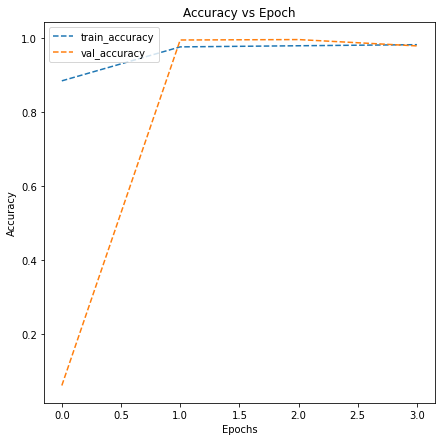

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 8s 89ms/step - loss: 0.0521 - accuracy: 0.9877

 Test_Accuracy:- 0.9876922965049744


####<b>Observations and insights: This model is performing better than the base and Model 1. The differences between the models being that this one has Batch Normalization and Leaky ReLU layers. Additionally, the validation split was changed to 0.25 in order to give some more data to the validation set. The test accuracy for this Model 2 is 0.9877.

<b> Generate the classification report and confusion matrix

82/82 [==============================] - 12s 140ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



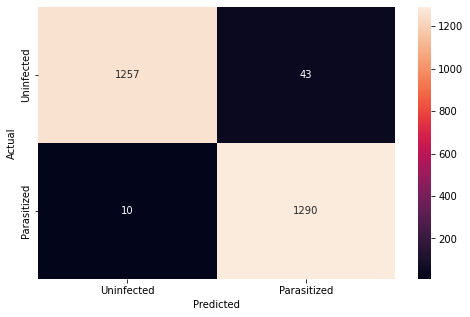

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

The model has good recall for 1 (Parasitized Cells) but not as good as the base model for Uninfected Cells.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

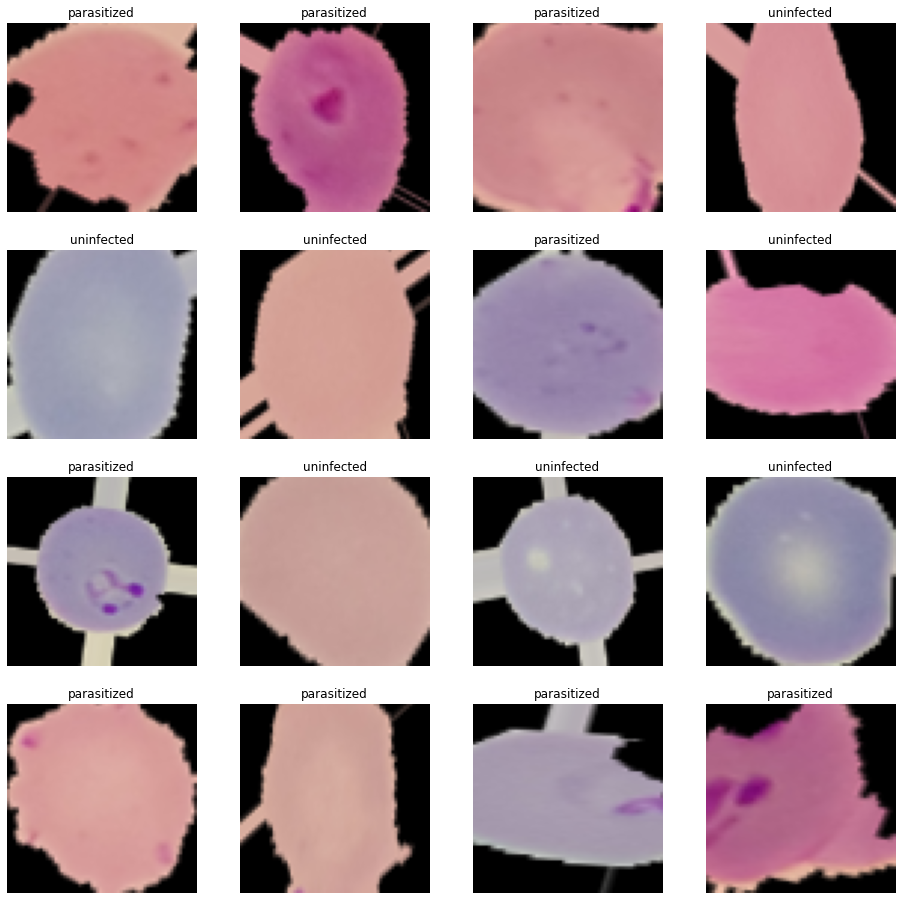

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: The image data generator has randomly flipped images horizontally and the zoom was set to 0.5 to 1.5 and randomly rotated within 30 degrees. Therefore, the images show that.

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model3.add(LeakyReLU(0.1))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(BatchNormalization())

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(BatchNormalization())

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(LeakyReLU(0.1))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(BatchNormalization())

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(2, activation = "softmax"))

opt = Adam(learning_rate=0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 268s 846ms/step - loss: 0.3732 - accuracy: 0.8375 - val_loss: 0.9066 - val_accuracy: 0.4896
Epoch 2/20
312/312 [==============================] - 269s 863ms/step - loss: 0.1826 - accuracy: 0.9355 - val_loss: 0.2480 - val_accuracy: 0.9073
Epoch 3/20
312/312 [==============================] - 265s 850ms/step - loss: 0.1554 - accuracy: 0.9459 - val_loss: 0.1026 - val_accuracy: 0.9671
Epoch 4/20
312/312 [==============================] - 266s 854ms/step - loss: 0.1464 - accuracy: 0.9513 - val_loss: 0.0792 - val_accuracy: 0.9724
Epoch 5/20
312/312 [==============================] - 273s 874ms/step - loss: 0.1355 - accuracy: 0.9542 - val_loss: 0.0726 - val_accuracy: 0.9736
Epoch 6/20
312/312 [==============================] - 268s 859ms/step - loss: 0.1372 - accuracy: 0.9542 - val_loss: 0.0637 - val_accuracy: 0.9784
Epoch 7/20
312/312 [==============================] - 268s 859ms/step - loss: 0.1414 - accuracy: 0.9526 - val_loss: 0.0916 -

###<B>Evaluating the model

<b>Plot the train and validation accuracy

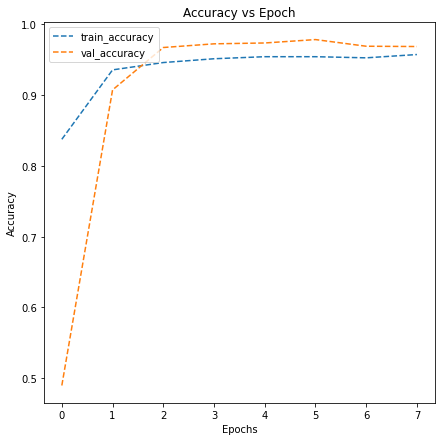

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 14s 177ms/step - loss: 0.0987 - accuracy: 0.9723

 Test_Accuracy:- 0.9723076820373535


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 11s 130ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1300
           1       0.99      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



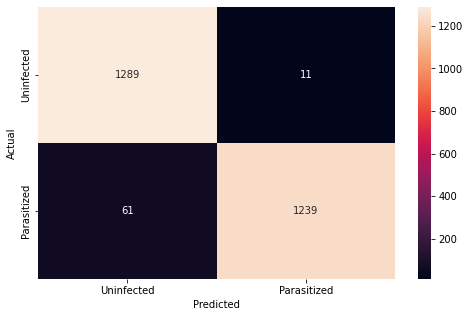

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Recall is too low - Try again

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

In [ ]:
model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

###<b>Compiling the model

In [ ]:
# Compiling the model
opt = Adam(learning_rate=0.001)

model4.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1259s 2s/step - loss: 0.2286 - accuracy: 0.9120 - val_loss: 0.2159 - val_accuracy: 0.9285
Epoch 2/10
624/624 [==============================] - 1262s 2s/step - loss: 0.1850 - accuracy: 0.9278 - val_loss: 0.1345 - val_accuracy: 0.9744
Epoch 3/10
624/624 [==============================] - 1256s 2s/step - loss: 0.1861 - accuracy: 0.9288 - val_loss: 0.1134 - val_accuracy: 0.9794
Epoch 4/10
624/624 [==============================] - 1267s 2s/step - loss: 0.1781 - accuracy: 0.9325 - val_loss: 0.0799 - val_accuracy: 0.9884
Epoch 5/10
624/624 [==============================] - 1258s 2s/step - loss: 0.1698 - accuracy: 0.9356 - val_loss: 0.0711 - val_accuracy: 0.9882
Epoch 6/10
624/624 [==============================] - 1229s 2s/step - loss: 0.1643 - accuracy: 0.9376 - val_loss: 0.4225 - val_accuracy: 0.8482
Epoch 7/10
624/624 [==============================] - 1251s 2s/step - loss: 0.1613 - accuracy: 0.9381 - val_loss: 0.1043 - val_accuracy:

<b>Plot the train and validation accuracy

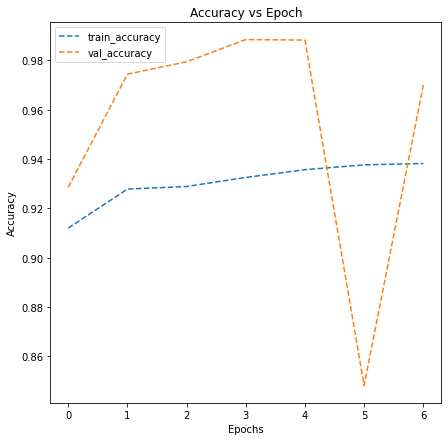

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

82/82 [==============================] - 137s 2s/step - loss: 0.1364 - accuracy: 0.9512


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 140s 2s/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



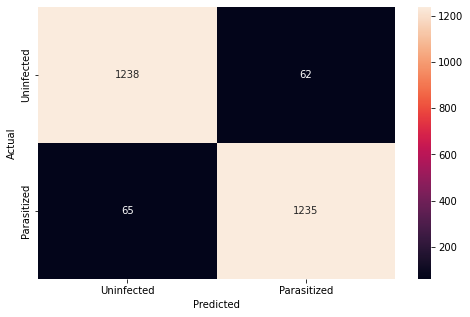

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

## Model 5 - HSV Image Model

In [ ]:
import cv2

#Convert training images

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 24958, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

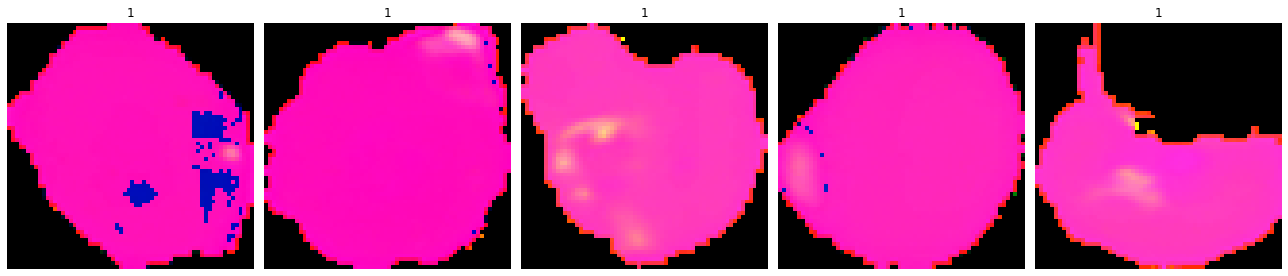

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
# Convert test images
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 2600, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx_test.append(a)

gfx_test = np.array(gfx_test)

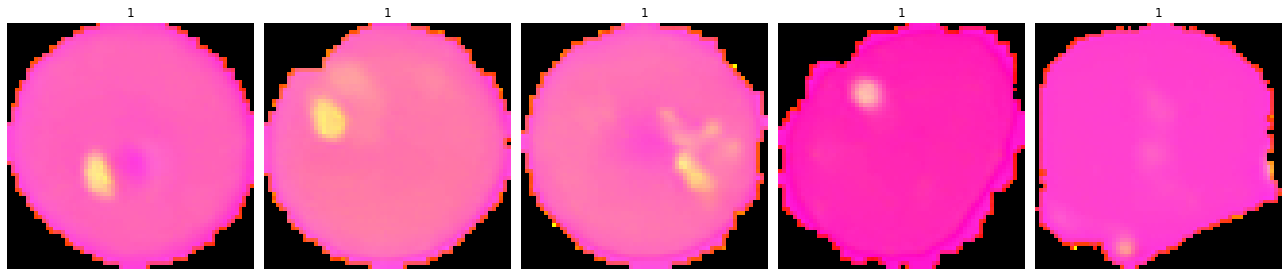

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
print(gfx.shape)
print(gfx_test.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


In [ ]:
# Encoding Train Labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

In [ ]:
# Clearing backend

import tensorflow as tf

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import Adam

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model5.add(LeakyReLU(0.1))

model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model5.add(MaxPooling2D(pool_size = 2))

model5.add(BatchNormalization())

model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model5.add(LeakyReLU(0.1))

model5.add(MaxPooling2D(pool_size = 2))

model5.add(BatchNormalization())

model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model5.add(LeakyReLU(0.1))

model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model5.add(BatchNormalization())

model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model5.add(BatchNormalization())

model5.add(LeakyReLU(0.1))

model5.add(Dropout(0.2))

model5.add(Flatten())

model5.add(Dense(512, activation = "relu"))

model5.add(Dropout(0.4))

model5.add(Dense(2, activation = "softmax"))

opt = Adam(learning_rate=0.001)

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4

In [ ]:
model5.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model5.fit(gfx, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.25, epochs = 20, verbose = 1)

Epoch 1/20
585/585 [==============================] - 348s 590ms/step - loss: 0.6203 - accuracy: 0.6998 - val_loss: 1.5289 - val_accuracy: 0.0373
Epoch 2/20
585/585 [==============================] - 318s 543ms/step - loss: 0.3507 - accuracy: 0.8361 - val_loss: 1.0166 - val_accuracy: 0.4904
Epoch 3/20
585/585 [==============================] - 301s 515ms/step - loss: 0.1390 - accuracy: 0.9475 - val_loss: 0.7998 - val_accuracy: 0.9189
Epoch 4/20
585/585 [==============================] - 319s 546ms/step - loss: 0.0834 - accuracy: 0.9718 - val_loss: 2.3664 - val_accuracy: 0.1971
Epoch 5/20
585/585 [==============================] - 310s 530ms/step - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.2960 - val_accuracy: 0.9351
Epoch 6/20
585/585 [==============================] - 298s 509ms/step - loss: 0.0645 - accuracy: 0.9775 - val_loss: 0.0946 - val_accuracy: 0.9814
Epoch 7/20
585/585 [==============================] - 290s 495ms/step - loss: 0.0481 - accuracy: 0.9833 - val_loss: 0.0131 -

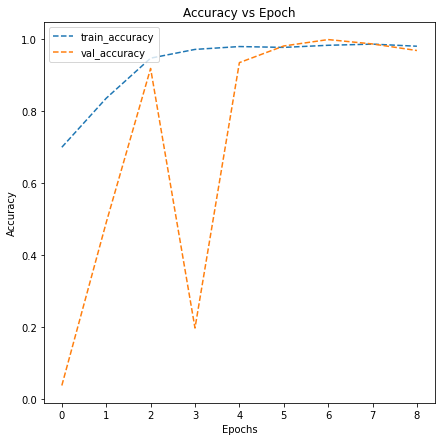

In [ ]:
plot_accuracy(history5)

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model5.evaluate(gfx_test, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 9s 98ms/step - loss: 0.0880 - accuracy: 0.9838

 Test_Accuracy:- 0.983846127986908


82/82 [==============================] - 19s 225ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



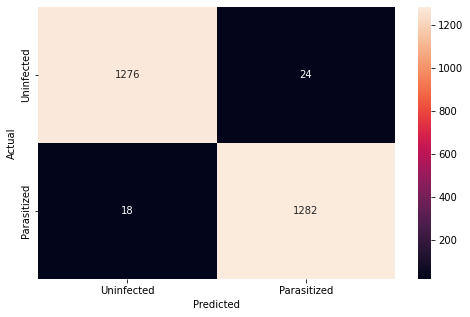

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(gfx_test)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?